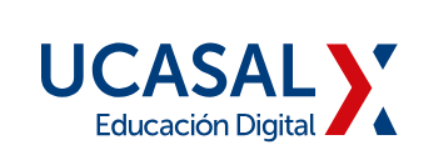

# **Universidad Católica de Salta**
## **Materia:** **Matemática Discreta**

## **TP 6**  

### **Docente:** Prof Mg Ing Rafael Visa

### **Alumnas**:

### Claudia Peña,

### Analia Pastrana,

### Diana B. Olivera,

### Maria R. Muñoz Labanca




Presentación-
planteo del problema-
estructura utilizada (grafos, info en nodo), relación (Padre e hijo)-
herramientas utilizadas (collab, librería, python)-
demo en collab (Los Simpson)

In [1]:
#pip install networkx

In [2]:
pip install pydot

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://networkx.org/

In [4]:
import json
import os

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
from io import BytesIO

In [6]:
path = "/content/drive/MyDrive/Matematica_Discreta_TP"

In [19]:
# Añadir nodos con información compleja
simpsons = [
    {
        "dni": "11111111A",
        "nombre": "Homer",
        "apellido": "Simpson",
        "fecha_nacimiento": "1956-05-12",
        "dni_padre": "33333333C",
        "dni_madre": "44444444D",
        "dni_esposa": "22222222B",
        "foto": path + "/familia_simpson/Homer_Simpson.png"
    },
    {
        "dni": "22222222B",
        "nombre": "Marge",
        "apellido": "Bouvier",
        "fecha_nacimiento": "1956-10-01",
        "dni_padre": "55555555E",
        "dni_madre": "66666666F",
        "dni_esposo": "11111111A",
        "foto": path + "/familia_simpson/Marge_Bouvier.png"
    },
      {
        "dni": "25252525B",
        "nombre": "Paty",
        "apellido": "Bouvier",
        "fecha_nacimiento": "1950-10-01",
        "dni_padre": "55555555E",
        "dni_madre": "66666666F",
        "dni_esposo": None,
        "foto": path + "/familia_simpson/Paty_Bouvier.png"
    },
      {
        "dni": "24242424B",
        "nombre": "Selma",
        "apellido": "Bouvier",
        "fecha_nacimiento": "1950-10-01",
        "dni_padre": "55555555E",
        "dni_madre": "66666666F",
        "dni_esposo":None,
        "foto": path + "/familia_simpson/Selma_Bouvier.png"
    },
    {
        "dni": "33333333C",
        "nombre": "Abraham",
        "apellido": "Simpson",
        "fecha_nacimiento": "1920-05-25",
        "dni_padre": None,
        "dni_madre": None,
        "foto": path + "/familia_simpson/Abraham_Simpson.png"
    },
    {
        "dni": "44444444D",
        "nombre": "Mona",
        "apellido": "Olsen",
        "fecha_nacimiento": "1929-03-15",
        "dni_padre": None,
        "dni_madre": None,
        "foto": path + "/familia_simpson/Mona_Olsen.png"
    },
    {
        "dni": "55555555E",
        "nombre": "Clancy",
        "apellido": "Bouvier",
        "fecha_nacimiento": "1930-01-02",
        "dni_padre": None,
        "dni_madre": None,
        "foto": path + "/familia_simpson/Clancy_Bouvier.png"
    },
    {
        "dni": "66666666F",
        "nombre": "Jacqueline",
        "apellido": "Bouvier",
        "fecha_nacimiento": "1935-08-11",
        "dni_padre": None,
        "dni_madre": None,
        "foto": path + "/familia_simpson/Jacqueline_Bouvier.png"
    },
    {
        "dni": "77777777G",
        "nombre": "Bart",
        "apellido": "Simpson",
        "fecha_nacimiento": "1980-04-01",
        "dni_padre": "11111111A",
        "dni_madre": "22222222B",
        "foto": path + "/familia_simpson/Bart_Simpson.png"
    },
    {
        "dni": "88888888H",
        "nombre": "Lisa",
        "apellido": "Simpson",
        "fecha_nacimiento": "1982-05-09",
        "dni_padre": "11111111A",
        "dni_madre": "22222222B",
        "foto": path + "/familia_simpson/Lisa_Simpson.png"
    },
    {
        "dni": "99999999I",
        "nombre": "Maggie",
        "apellido": "Simpson",
        "fecha_nacimiento": "1988-01-12",
        "dni_padre": "11111111A",
        "dni_madre": "22222222B",
        "foto": path + "/familia_simpson/Maggie_Simpson.png"
    }
]


In [20]:
file_path = path +'/simpsons.json'
with open(file_path, 'w') as file:
    json.dump(simpsons, file, indent=4)

In [21]:
with open('simpsons.json', 'r') as file:
    simpsons = json.load(file)

<ipython-input-22-9bf561a14c06>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


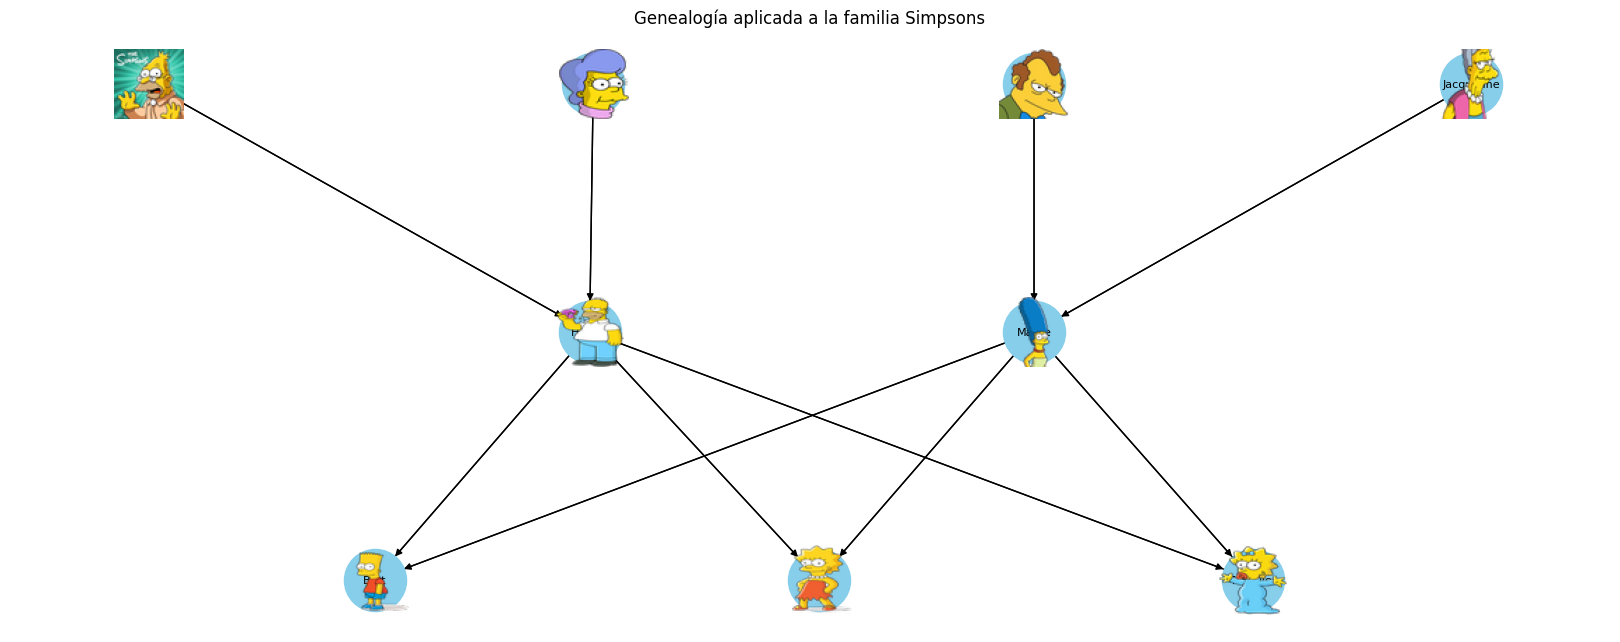

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Crear un grafo vacío
G = nx.DiGraph()

# Añadir nodos al grafo
# for persona in simpsons:
#     G.add_node(persona["dni"], nombre=persona["nombre"], apellido=persona["apellido"], fecha_nacimiento=persona["fecha_nacimiento"])

for persona in simpsons:
    G.add_node(persona["dni"], foto=persona["foto"], nombre=persona["nombre"], apellido=persona["apellido"], fecha_nacimiento=persona["fecha_nacimiento"])

# Añadir aristas basadas en relaciones de progenitores
for persona in simpsons:
    if persona["dni_padre"]:
        G.add_edge(persona["dni_padre"], persona["dni"], relacion="padre")
    if persona["dni_madre"]:
        G.add_edge(persona["dni_madre"], persona["dni"], relacion="madre")
#     # # if "dni_esposo" in persona and persona["dni_esposo"]:
#     # #     G.add_edge(persona["dni"], persona["dni_esposo"], relacion="esposo")
#     # # if "dni_esposa" in persona and persona["dni_esposa"]:
#     # #     G.add_edge(persona["dni"], persona["dni_esposa"], relacion="esposa")

# Posicionar nodos en el gráfico usando graphviz_layout de pydot
pos = graphviz_layout(G, prog='dot')

# Dibujar nodos y etiquetas de nombres
plt.figure(figsize=(16, 6))
nx.draw(G, pos, with_labels=False, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
labels = {nodo: datos['nombre'] for nodo, datos in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Dibujar aristas
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black')

# Añadir imágenes a los nodos
ax = plt.gca()
for nodo, (x, y) in pos.items():
    img_path = G.nodes[nodo]['foto']
    img = Image.open(img_path)
    img = img.resize((50, 50), Image.LANCZOS)
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)
ax.margins(0.05)
plt.tight_layout()

# Mostrar el gráfico
plt.title("Genealogía aplicada a la familia Simpsons")
plt.show()

In [11]:
# Función para encontrar el ancestro común más reciente (ACMR)
def encontrar_acmr(grafo, persona1, persona2):
    # Obtener los antecesores de ambas personas
    ancestros1 = nx.ancestors(grafo, persona1)
    ancestros2 = nx.ancestors(grafo, persona2)

    # Incluir las propias personas en sus conjuntos de ancestros
    ancestros1.add(persona1)
    ancestros2.add(persona2)

    # Encontrar la intersección de los conjuntos de ancestros
    ancestros_comunes = ancestros1.intersection(ancestros2)

      # Obtener los nombres de los ancestros comunes
    nombres_ancestros_comunes = []
    for ancestro in ancestros_comunes:
        nombres_ancestros_comunes.append(grafo.nodes[ancestro]["nombre"])

    return ancestros_comunes

In [12]:
nombre_a_dni = {
  "Homer": "11111111A",
    "Marge": "22222222B",
    "Abraham": "33333333C",
    "Mona": "44444444D",
    "Clancy": "55555555E",
    "Jacqueline": "66666666F",
    "Bart": "77777777G",
    "Lisa": "88888888H",
    "Maggie": "99999999I"
}


In [13]:
def cambiar_nombre(dni):
    if dni in nombre_a_dni.values():
        for nombre, dni_valor in nombre_a_dni.items():
            if dni_valor == dni:
                return nombre
    else:
        return None

In [23]:
# Función para encontrar ancestros comunes más recientes (ACMR)
def encontrar_acmr(grafo, persona1, persona2):
    ancestros1 = nx.ancestors(grafo, persona1)
    ancestros2 = nx.ancestors(grafo, persona2)
    ancestros_comunes = ancestros1.intersection(ancestros2)

    return ancestros_comunes

# Encontrar ACMR entre dos personas
persona1 = nombre_a_dni["Maggie"]  # DNI de la primera persona
persona2 = nombre_a_dni["Marge"]  # DNI de la segunda persona
ancestros_comunes_dni = encontrar_acmr(G, persona1, persona2)

# Obtener los nombres de los ancestros comunes
ancestros_comunes_nombre = [G.nodes[dni]["nombre"] for dni in ancestros_comunes_dni]

In [24]:
ancestros_comunes_nombre

['Clancy', 'Jacqueline']

In [16]:
# Función para recorrer el grafo en profundidad
def dfs_recorrido(grafo, nodo_inicio):
    visitados = set()
    recorrido = []

    def dfs(nodo):
        if nodo not in visitados:
            visitados.add(nodo)
            recorrido.append(nodo)
            for vecino in grafo[nodo]:
                dfs(vecino)

    dfs(nodo_inicio)
    return recorrido

In [17]:
nodo_inicio = nombre_a_dni["Jacqueline"]
recorrido_dfs = dfs_recorrido(G, nodo_inicio)
nombre = cambiar_nombre(nodo_inicio)
recorrido_dfs_1 = [cambiar_nombre(x) for x in recorrido_dfs]
print(f"Recorrido en profundidad a partir de {nombre}: {recorrido_dfs_1}")

Recorrido en profundidad a partir de Jacqueline: ['Jacqueline', 'Marge', 'Bart', 'Lisa', 'Maggie']


In [18]:
nodo_inicio = nombre_a_dni["Homer"]
recorrido_dfs = dfs_recorrido(G, nodo_inicio)
nombre = cambiar_nombre(nodo_inicio)
recorrido_dfs_1 = [cambiar_nombre(x) for x in recorrido_dfs]
print(f"Recorrido en profundidad a partir de {nombre}: {recorrido_dfs_1}")

Recorrido en profundidad a partir de Homer: ['Homer', 'Bart', 'Lisa', 'Maggie']
